--- File Metadata ---
Shape (height, width): (783, 1250)
Data Type: uint16
Coordinate System: EPSG:4326
Registered NoData Value: None

--- Data Statistics (on valid pixels) ---
Total Pixels in file: 978,750
Valid Data Pixels: 978,750
NoData / Empty Pixels: 0
Min Elevation: 0.00 m
Max Elevation: 65535.00 m
Mean Elevation: 55101.29 m
Median Elevation: 65535.00 m

--- Elevation Distribution Histogram ---


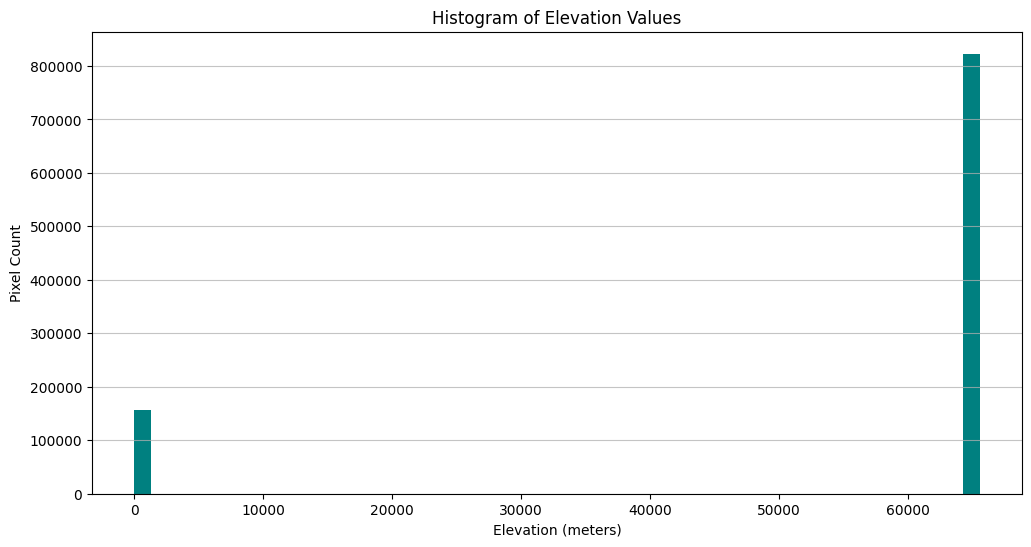

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Define the path to your DEM file ---
dem_path = '/Users/chaitanyakartik/Projects/AgroSpectra/data/SRTM-DEM/EO_Browser_images/2023-02-28-00_00_2023-02-28-23_59_DEM_COPERNICUS_30_DEM_(Raw).tiff'

try:
    with rasterio.open(dem_path) as src:
        # --- 2. Get File Metadata ---
        nodata_value = src.nodata
        dem_array = src.read(1).astype('float32')

        print("--- File Metadata ---")
        print(f"Shape (height, width): {src.shape}")
        print(f"Data Type: {src.dtypes[0]}")
        print(f"Coordinate System: {src.crs}")
        print(f"Registered NoData Value: {nodata_value}")

        # --- 3. Clean the Data ---
        # Create a clean version of the array where NoData values are replaced with NaN
        dem_clean = dem_array.copy()
        if nodata_value is not None:
            dem_clean[dem_clean == nodata_value] = np.nan
        # Also handle other potential NoData conventions, just in case
        dem_clean[dem_clean < -1000] = np.nan

        # --- 4. Calculate Descriptive Statistics on CLEAN data ---
        # Flatten the 2D array into a 1D list and remove all NaN values
        dem_flat_clean = dem_clean[~np.isnan(dem_clean)]

        print("\n--- Data Statistics (on valid pixels) ---")
        if dem_flat_clean.size > 0:
            print(f"Total Pixels in file: {dem_array.size:,}")
            print(f"Valid Data Pixels: {dem_flat_clean.size:,}")
            print(f"NoData / Empty Pixels: {dem_array.size - dem_flat_clean.size:,}")
            print(f"Min Elevation: {dem_flat_clean.min():.2f} m")
            print(f"Max Elevation: {dem_flat_clean.max():.2f} m")
            print(f"Mean Elevation: {dem_flat_clean.mean():.2f} m")
            print(f"Median Elevation: {np.median(dem_flat_clean):.2f} m")
        else:
            print("ERROR: No valid data pixels found. The file may be empty or all NoData.")

        # --- 5. Visualize the Data Distribution ---
        if dem_flat_clean.size > 0:
            print("\n--- Elevation Distribution Histogram ---")
            plt.figure(figsize=(12, 6))
            plt.hist(dem_flat_clean, bins=50, color='teal')
            plt.title('Histogram of Elevation Values')
            plt.xlabel('Elevation (meters)')
            plt.ylabel('Pixel Count')
            plt.grid(axis='y', alpha=0.75)
            plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")

--- Data Cleaning ---
Outlier values (0 and 65535) have been set to 'No Data'.

--- Corrected Data Statistics ---
ERROR: No valid data pixels found after cleaning.

--- Corrected DEM Visualization ---


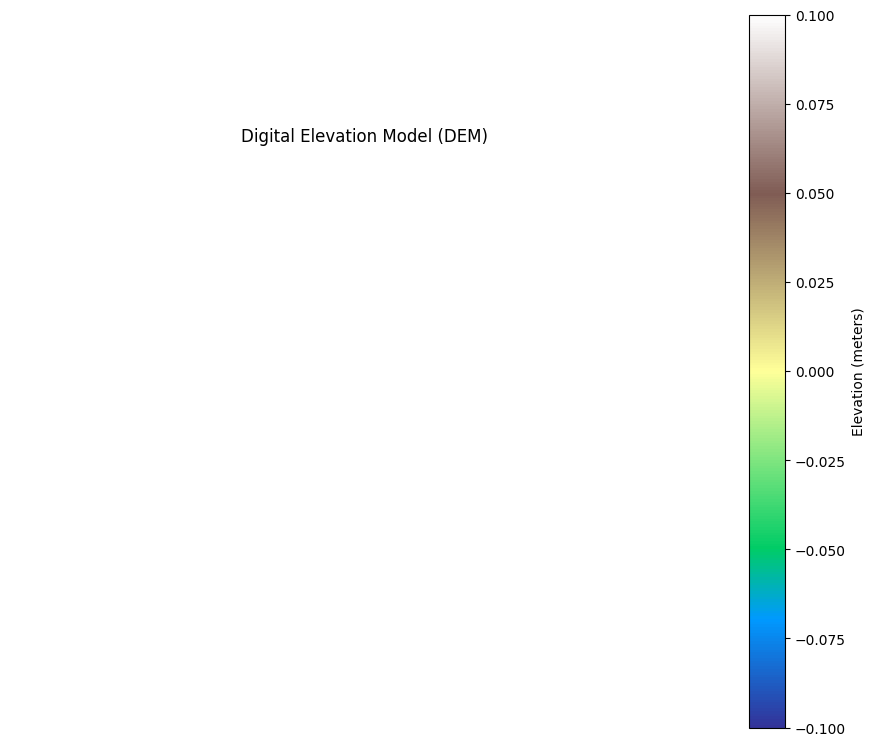

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Define the path to your DEM file ---
dem_path = '/Users/chaitanyakartik/Projects/AgroSpectra/data/SRTM-DEM/EO_Browser_images/2023-02-28-00_00_2023-02-28-23_59_DEM_COPERNICUS_30_DEM_(Raw).tiff'

try:
    with rasterio.open(dem_path) as src:
        # --- 2. Load the raw data ---
        dem_array = src.read(1).astype('float32')

        # --- 3. THE FIX: Correctly handle NoData values ---
        # We will treat the outlier value 65535 as NoData.
        # Often 0 is also used as a null value in DEMs, so we'll remove it too.
        dem_clean = dem_array.copy()
        dem_clean[dem_clean >= 65535] = np.nan
        dem_clean[dem_clean == 0] = np.nan
        print("--- Data Cleaning ---")
        print("Outlier values (0 and 65535) have been set to 'No Data'.")

        # --- 4. Re-calculate Descriptive Statistics on CLEAN data ---
        dem_flat_clean = dem_clean[~np.isnan(dem_clean)]

        print("\n--- Corrected Data Statistics ---")
        if dem_flat_clean.size > 0:
            print(f"Valid Data Pixels: {dem_flat_clean.size:,}")
            print(f"Min Elevation: {dem_flat_clean.min():.2f} m")
            print(f"Max Elevation: {dem_flat_clean.max():.2f} m")
            print(f"Mean Elevation: {dem_flat_clean.mean():.2f} m")
        else:
            print("ERROR: No valid data pixels found after cleaning.")

        # --- 5. Visualize the Corrected Distribution ---
        if dem_flat_clean.size > 0:
            print("\n--- Corrected Elevation Distribution Histogram ---")
            plt.figure(figsize=(12, 6))
            plt.hist(dem_flat_clean, bins=50, color='teal')
            plt.title('Histogram of True Elevation Values')
            plt.xlabel('Elevation (meters)')
            plt.ylabel('Pixel Count')
            plt.grid(axis='y', alpha=0.75)
            plt.show()

        # --- 6. Generate the Corrected Visualization ---
        print("\n--- Corrected DEM Visualization ---")
        plt.figure(figsize=(10, 10))
        im = plt.imshow(dem_clean, cmap='terrain')
        plt.title('Digital Elevation Model (DEM)')
        plt.colorbar(im, fraction=0.046, pad=0.04, label='Elevation (meters)')
        plt.axis('off')
        plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")

CRS: EPSG:4326
Bounds: BoundingBox(left=82.527219, bottom=22.328128, right=82.566487, top=22.350894)
Resolution: 3.14143999999942e-05 x 2.907535121328318e-05
DEM shape: (783, 1250)
Elevation stats:
  Min: 0.0
  Max: 65535.0
  Mean: 55102.8993256705
  Std: 23975.800157926697


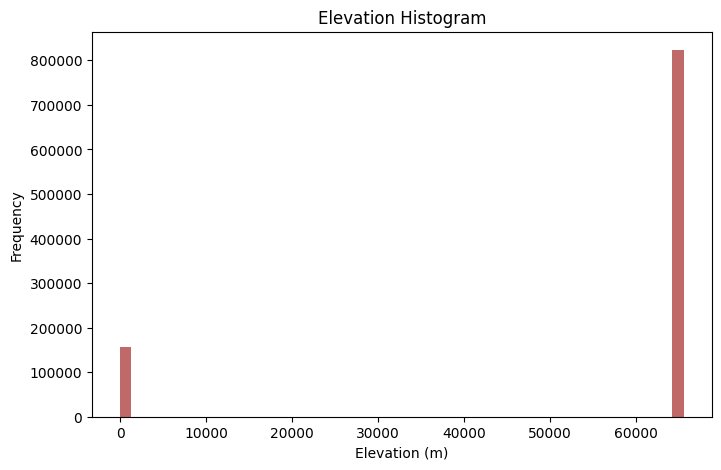

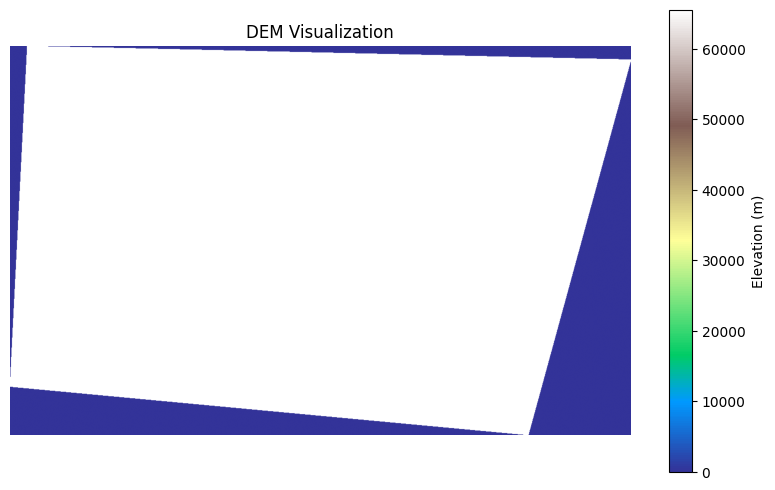

In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to DEM
dem_path = '/Users/chaitanyakartik/Downloads/2025-09-24-00_00_2025-09-24-23_59_DEM_COPERNICUS_90_DEM_(Raw).tiff'

# Open DEM
with rasterio.open(dem_path) as src:
    dem = src.read(1)  # Read first band
    profile = src.profile

# Mask no-data values
dem = np.where(dem == profile['nodata'], np.nan, dem)

# Print metadata
print("CRS:", profile['crs'])
print("Bounds:", src.bounds)
print("Resolution:", profile['transform'][0], "x", -profile['transform'][4])
print("DEM shape:", dem.shape)

# Basic statistics
print("Elevation stats:")
print("  Min:", np.nanmin(dem))
print("  Max:", np.nanmax(dem))
print("  Mean:", np.nanmean(dem))
print("  Std:", np.nanstd(dem))

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(dem[~np.isnan(dem)].ravel(), bins=50, color='brown', alpha=0.7)
plt.title("Elevation Histogram")
plt.xlabel("Elevation (m)")
plt.ylabel("Frequency")
plt.show()

# Plot DEM
plt.figure(figsize=(10,6))
plt.imshow(dem, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title("DEM Visualization")
plt.axis('off')
plt.show()


In [17]:
with rasterio.open(dem_path) as src:
    dem = src.read(1).astype(float)

# Mask nodata manually
dem[(dem == 0) | (dem == 65535)] = np.nan

print("Valid pixels left:", np.count_nonzero(~np.isnan(dem)))

if np.count_nonzero(~np.isnan(dem)) == 0:
    print("⚠️ No valid DEM data in this AOI – try downloading a different DEM product (e.g., GLO-30).")
else:
    print("DEM OK – Stats:")
    print("  Min:", np.nanmin(dem))
    print("  Max:", np.nanmax(dem))
    print("  Mean:", np.nanmean(dem))
    print("  Std:", np.nanstd(dem))


Valid pixels left: 0
⚠️ No valid DEM data in this AOI – try downloading a different DEM product (e.g., GLO-30).


Sentinel-2 B4, B8, B11 loaded and scaled.
Sentinel-1 VV loaded and resampled.
Applying Gaussian smoothing with sigma=10...
Combining smoothed layers to create pseudo-DEM...
Smoothed pseudo-DEM saved to: /Users/chaitanyakartik/Projects/AgroSpectra/data/SRTM-DEM/Synthetic_Data/pseudo_dem_smoothed.tiff


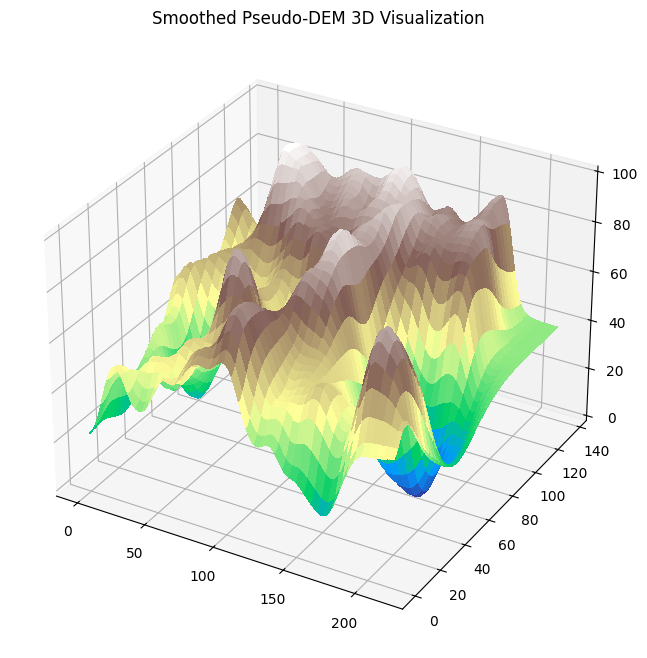

In [23]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from rasterio.enums import Resampling
from scipy.ndimage import gaussian_filter # <<< IMPORT THIS

# -----------------------------
# --- Paths / Project setup ---
# -----------------------------
# --- (Your paths remain the same) ---
project_root = "/Users/chaitanyakartik/Projects/AgroSpectra"
s2_data_dir = os.path.join(project_root, "data", "Sentinel2-Hyperspectral", "EO_Browser_images", "Korba_Coal_AOI1_Jan10")
b4_path = os.path.join(s2_data_dir, '2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B04_(Raw).tiff')
b8_path = os.path.join(s2_data_dir, '2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B08_(Raw).tiff')
b11_path = os.path.join(s2_data_dir, '2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B11_(Raw).tiff')
s1_data_dir = os.path.join(project_root, "data", "Sentinel1-SAR", "EO_Browser_images", "Korba_Coal_AOI1_Jan10")
vv_path = os.path.join(s1_data_dir, '2023-01-10-00:00_2023-01-10-23:59_Sentinel-1_AWS-IW-VVVH_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# -----------------------------
# --- Helper function to read raster ---
# -----------------------------
def read_raster(path):
    with rasterio.open(path) as src:
        # Handle potential NoData values by reading into a masked array
        data = src.read(1, masked=True).astype(np.float32)
        # Fill masked values (NoData) with the mean of the valid data
        if np.ma.is_masked(data):
            data = data.filled(data.mean())
        meta = src.meta.copy()
    return data, meta

# -----------------------------
# --- Load & Preprocess Data ---
# -----------------------------
b4, meta = read_raster(b4_path)
b8, _ = read_raster(b8_path)
b11, _ = read_raster(b11_path)

# Apply scaling
b4 /= 10000
b8 /= 10000
b11 /= 10000

print("Sentinel-2 B4, B8, B11 loaded and scaled.")

# Load and resample Sentinel-1
with rasterio.open(vv_path) as src:
    vv_db = src.read(
        1,
        out_shape=(b4.shape[0], b4.shape[1]),
        resampling=Resampling.bilinear,
        masked=True
    )
    if np.ma.is_masked(vv_db):
        vv_db = vv_db.filled(vv_db.mean())

print("Sentinel-1 VV loaded and resampled.")


# -----------------------------
# --- Compute Indices ---
# -----------------------------
# Use np.nan_to_num to prevent errors from potential division by zero
ndvi = np.nan_to_num((b8 - b4) / (b8 + b4 + 1e-8))
bsi = np.nan_to_num((b11 - b8) / (b11 + b8 + 1e-8))
vv_norm = (vv_db - np.nanmin(vv_db)) / (np.nanmax(vv_db) - np.nanmin(vv_db))

# -----------------------------------------------------
# --- NEW: Smooth the layers to create realistic forms ---
# -----------------------------------------------------
# This is the most important step to remove the "spiky" noise.
# Sigma controls the amount of smoothing. Higher values = smoother terrain.
# Start with a value like 5 or 10 and experiment.
SMOOTHING_FACTOR = 10
print(f"Applying Gaussian smoothing with sigma={SMOOTHING_FACTOR}...")

# Smooth each component
land_cover_component = gaussian_filter(0.6 * (1 - ndvi) + 0.4 * bsi, sigma=SMOOTHING_FACTOR)
texture_component = gaussian_filter(vv_norm, sigma=SMOOTHING_FACTOR / 2) # Less smoothing for texture

# -----------------------------
# --- Create pseudo-DEM ---
# -----------------------------
# Combine the smoothed components. This now represents broad landforms + texture.
print("Combining smoothed layers to create pseudo-DEM...")
pseudo_dem = land_cover_component + 0.3 * texture_component

# Normalize the final result
pseudo_dem = pseudo_dem - np.nanmin(pseudo_dem)
pseudo_dem = pseudo_dem / np.nanmax(pseudo_dem)
pseudo_dem *= 100  # Scale to an arbitrary elevation range (e.g., 0-100m)

# -----------------------------
# --- Save pseudo-DEM as GeoTIFF ---
# -----------------------------
out_path = os.path.join(project_root, "data", "SRTM-DEM/Synthetic_Data/pseudo_dem_smoothed.tiff")
meta.update({"dtype": "float32", "count": 1})

with rasterio.open(out_path, "w", **meta) as dst:
    dst.write(pseudo_dem.astype(np.float32), 1)

print(f"Smoothed pseudo-DEM saved to: {out_path}")

# -----------------------------
# --- Optional: Quick 3D visualization ---
# -----------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
rows, cols = pseudo_dem.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
ax.plot_surface(x, y, pseudo_dem, cmap='terrain', linewidth=0, antialiased=False)
ax.set_title("Smoothed Pseudo-DEM 3D Visualization")
plt.show()

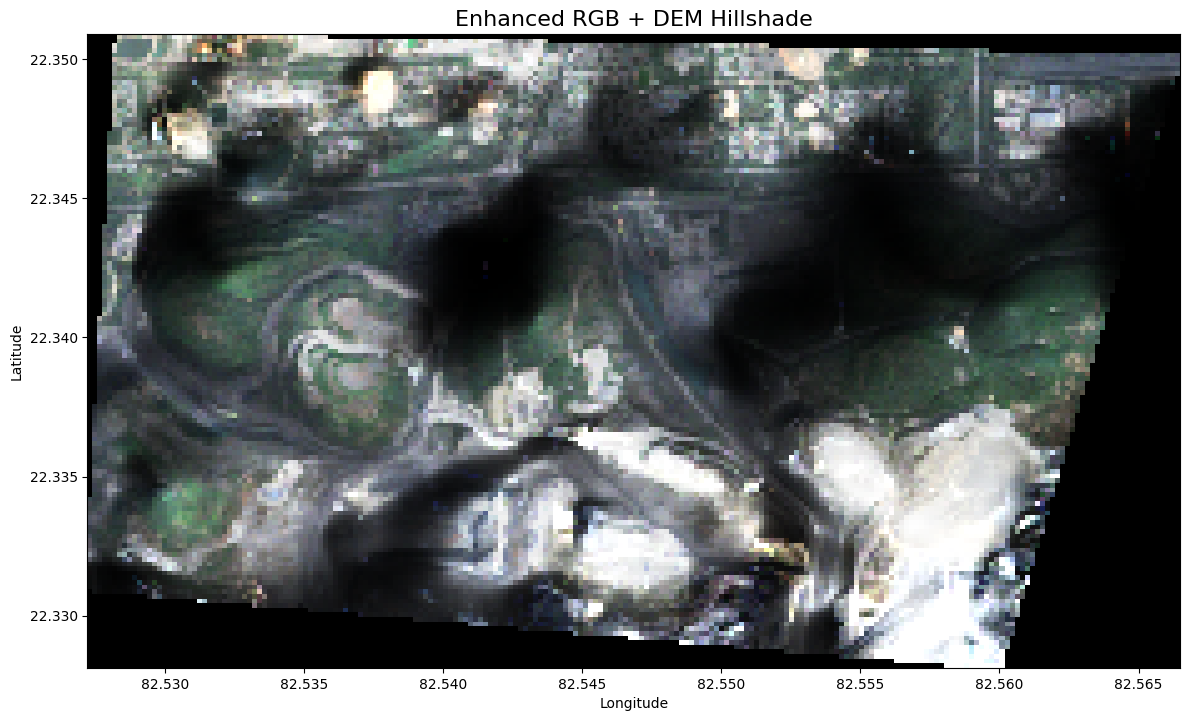

In [ ]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

# -----------------------------
# --- 1. DEFINE FILE PATHS ---
# -----------------------------
dem_path = "/Users/chaitanyakartik/Projects/AgroSpectra/data/SRTM-DEM/Synthetic_Data/pseudo_dem_smoothed.tiff"

rgb_data_dir = "/Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel2-Hyperspectral/EO_Browser_images/Korba_Coal_AOI1_RGB"
b2_path = os.path.join(rgb_data_dir, "2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B02_(Raw).tiff") # Blue
b3_path = os.path.join(rgb_data_dir, "2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B03_(Raw).tiff") # Green
b4_path = os.path.join(rgb_data_dir, "2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B04_(Raw).tiff") # Red

# -----------------------------
# --- 2. LOAD AND PREPARE DATA ---
# -----------------------------
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    extent = rasterio.plot.plotting_extent(src)

with rasterio.open(b4_path) as src:
    red = src.read(1)
with rasterio.open(b3_path) as src:
    green = src.read(1)
with rasterio.open(b2_path) as src:
    blue = src.read(1)

def normalize(band):
    """Contrast-stretch each band between 2nd and 98th percentile."""
    p2, p98 = np.percentile(band, (2, 98))
    return np.clip((band - p2) / (p98 - p2), 0, 1)

# Normalized RGB
rgb = np.dstack((normalize(red), normalize(green), normalize(blue)))

# -----------------------------------------------------------
# --- 3. BETTER HILLSHADE BLENDING ---
# -----------------------------------------------------------
ls = LightSource(azdeg=315, altdeg=45)

# Shade the RGB directly with DEM → better visual topography
rgb_hillshade = ls.shade_rgb(rgb, dem, vert_exag=5, blend_mode='overlay')

# -----------------------------
# --- 4. PLOT ---
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(rgb_hillshade, extent=extent)
ax.set_title("Enhanced RGB + DEM Hillshade", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Raw ranges -> red: 0.0 34891.0  green: 0.0 31404.0  blue: 0.0 28075.0
Auto-scaled bands by 10000 (converted to ~0..1 reflectance).


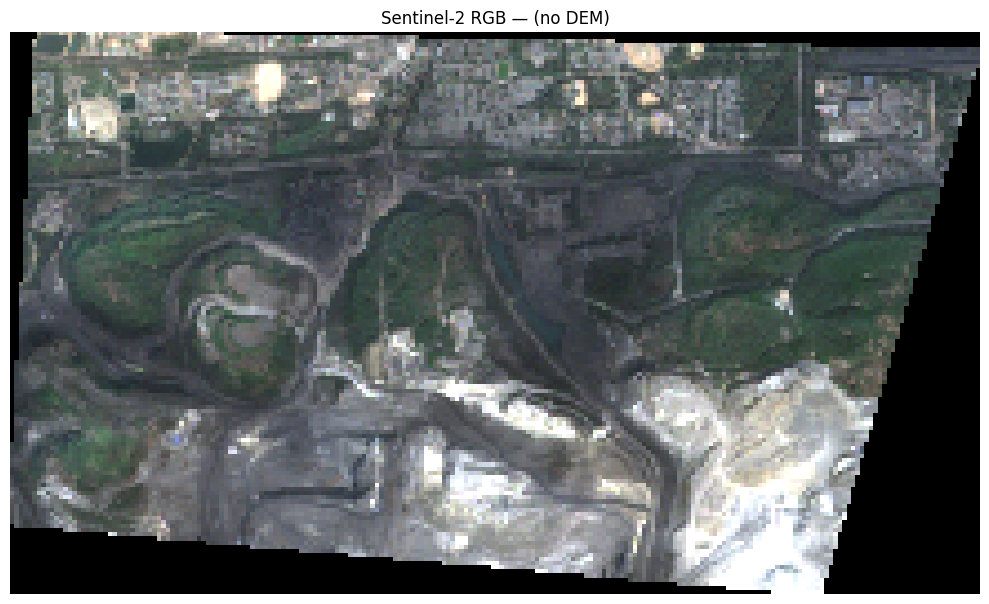

In [39]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# ---- Uses your existing paths: b4_path (Red), b3_path (Green), b2_path (Blue) ----

# Load bands (as float)
with rasterio.open(b4_path) as src:
    red = src.read(1).astype('float32')
    extent = rasterio.plot.plotting_extent(src)   # geo extent for plotting
with rasterio.open(b3_path) as src:
    green = src.read(1).astype('float32')
with rasterio.open(b2_path) as src:
    blue = src.read(1).astype('float32')

# Quick diagnostics (helps identify scaling issues)
print("Raw ranges -> red:", red.min(), red.max(),
      " green:", green.min(), green.max(),
      " blue:", blue.min(), blue.max())

# Auto-scale common Sentinel-2 L2A reflectance (if values look like 0..10000)
if max(red.max(), green.max(), blue.max()) > 1.1:
    red /= 10000.0
    green /= 10000.0
    blue /= 10000.0
    print("Auto-scaled bands by 10000 (converted to ~0..1 reflectance).")

# Per-band contrast stretch (2nd-98th percentile)
def normalize(band, p_low=2, p_high=98):
    p_lo, p_hi = np.percentile(band, (p_low, p_high))
    return np.clip((band - p_lo) / (p_hi - p_lo), 0.0, 1.0)

r_n = normalize(red)
g_n = normalize(green)
b_n = normalize(blue)

# Stack to RGB
rgb = np.dstack((r_n, g_n, b_n))

# Optional: gamma correction to tweak brightness (try 1.0, 1.2, 0.8)
gamma = 1.2
rgb = np.clip(rgb ** (1.0 / gamma), 0, 1)

# Display
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(rgb, extent=extent)
ax.set_title("Sentinel-2 RGB — (no DEM)")
ax.set_axis_off()     # hide axes for cleaner visual; remove if you want coords visible
plt.tight_layout()
plt.show()


Data loaded and RGB composite created.
Generating hillshade with Matplotlib LightSource...
Plotting the overlay...


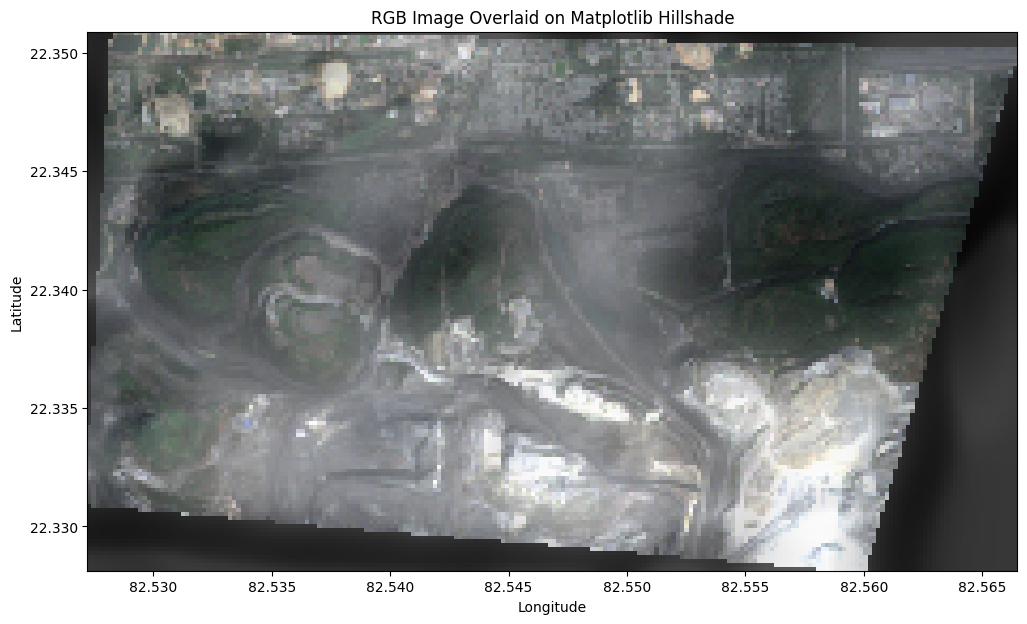

In [40]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource # <<< The key alternative import

# -----------------------------
# --- 1. DEFINE FILE PATHS ---
# -----------------------------
# Path to the smoothed DEM you created previously
dem_path = "/Users/chaitanyakartik/Projects/AgroSpectra/data/SRTM-DEM/Synthetic_Data/pseudo_dem_smoothed.tiff"

# Paths to the Sentinel-2 bands for the true-color RGB image
rgb_data_dir = "/Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel2-Hyperspectral/EO_Browser_images/Korba_Coal_AOI1_RGB"

b2_path = os.path.join(rgb_data_dir, "2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B02_(Raw).tiff") # Blue
b3_path = os.path.join(rgb_data_dir, "2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B03_(Raw).tiff") # Green
b4_path = os.path.join(rgb_data_dir, "2023-01-10-00:00_2023-01-10-23:59_Sentinel-2_L2A_B04_(Raw).tiff") # Red

# -----------------------------
# --- 2. LOAD AND PREPARE DATA ---
# -----------------------------
# Load the DEM
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    extent = rasterio.plot.plotting_extent(src)

# Load the RGB bands
with rasterio.open(b4_path) as src:
    red = src.read(1)
with rasterio.open(b3_path) as src:
    green = src.read(1)
with rasterio.open(b2_path) as src:
    blue = src.read(1)

# Function to normalize bands for better visual contrast
def normalize(band):
    p2, p98 = np.percentile(band, (2, 98))
    return np.clip((band - p2) / (p98 - p2), 0, 1)

# Stack the bands into a display-ready RGB image
rgb = np.dstack((normalize(red), normalize(green), normalize(blue)))
print("Data loaded and RGB composite created.")

# -----------------------------------------------------------
# --- 3. GENERATE HILLSHADE (MATPLOTLIB METHOD) ---
# -----------------------------------------------------------
print("Generating hillshade with Matplotlib LightSource...")

# Create a LightSource object, specifying the sun's angle
ls = LightSource(azdeg=315, altdeg=45)

# Generate the hillshade. The `shade` method returns an RGBA array.
# We use a gray colormap to create a classic hillshade effect.
hs = ls.shade(dem, cmap=plt.cm.gray, vert_exag=5, blend_mode='soft')

# -----------------------------
# --- 4. PLOT THE OVERLAY ---
# -----------------------------
print("Plotting the overlay...")
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the hillshade (which is already an RGBA image)
ax.imshow(hs, extent=extent)

# Plot the RGB image on top with transparency
ax.imshow(rgb, extent=extent, alpha=0.6)

ax.set_title("RGB Image Overlaid on Matplotlib Hillshade")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()